In [39]:
import os
import matplotlib.pyplot as plt
import numpy as np
import json

os.chdir("/mnt/c/Users/rosie/WSL/seg_epi/UNet_20220623_130057")

def get_loss_acc(file_name):

    loss_acc_file = open(file_name, "r")

    file_lines = loss_acc_file.readlines()

    pos = [file_lines[i].find(":") for i in range(0,len(file_lines))]
    start = [pos[i] + 2 for i in range(0, len(pos))]
    end = [pos[i] + 8 for i in range(0, len(pos))]     
    t_loss_acc = [file_lines[i][start[i]:end[i]].strip(" ,\n") for i in range(0,len(file_lines))]

    pos = [file_lines[i].rfind(":") for i in range(0,len(file_lines))]
    start = [pos[i] + 2 for i in range(0, len(pos))]
    end = [pos[i] + 8 for i in range(0, len(pos))]     
    v_loss_acc = [file_lines[i][start[i]:end[i]].strip(" ,\n") for i in range(0,len(file_lines))]

    return np.array(t_loss_acc, dtype = np.float32), np.array(v_loss_acc, dtype = np.float32)

loss_file = "losses.txt"
acc_file = "accuracy.txt"

t_loss, v_loss = get_loss_acc(loss_file)
t_acc, v_acc = get_loss_acc(acc_file)

print(t_loss)
print(v_loss)
print(t_acc)
print(v_acc)

[33.533 42.475 39.746 35.657 35.382 34.327 33.286 32.463 31.946 31.236
 30.91  31.878 30.714 30.128 30.289 29.918 29.076 29.083 30.198 29.442
 28.953 29.682 28.558 27.995 27.364 28.85  27.973 27.809 27.778 28.05
 27.176 26.828 28.204 27.141 27.922 28.049 26.791 27.507 27.189 26.922
 26.008 26.005 25.78  25.899 26.412 26.369 26.364 25.481 25.925 25.042]
[23.466 21.298 20.568 28.857 25.097 22.735 25.334 21.671 20.017 16.113
 25.717 20.974 18.206 17.058 21.607 15.455 15.89  18.027 14.41  18.677
 18.044 14.667 13.099 15.048 13.87  13.776 14.543 12.258 13.489 13.829
 14.805 12.881 12.696 18.296 12.263 15.699 11.926 13.178 16.397 11.763
 11.864 11.866 12.932 13.322 15.838 13.345 12.27  13.807 11.793 11.571]
[0.86  0.81  0.833 0.846 0.843 0.85  0.853 0.857 0.861 0.865 0.864 0.861
 0.866 0.869 0.868 0.869 0.875 0.874 0.868 0.873 0.876 0.871 0.876 0.879
 0.883 0.875 0.88  0.88  0.882 0.879 0.884 0.885 0.879 0.883 0.88  0.88
 0.886 0.882 0.884 0.885 0.889 0.889 0.89  0.89  0.888 0.888 0.887 0.89

0.0001


Text(0.5, 0.98, 'LR=0.001, WD=0.0001')

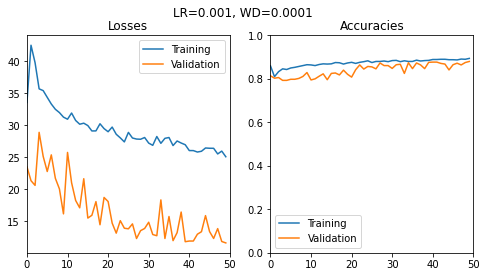

In [42]:
io = open("command_line_args.txt", "r")
command_args = json.load(io)

print(command_args['wd'])

fig, (axs1, axs2) = plt.subplots(nrows = 1, ncols = 2, figsize = [8,4])

axs1.set_xlim(0, len(t_loss))
axs1.plot(t_loss)
axs1.plot(v_loss)
axs1.legend(["Training", "Validation"])
axs1.set_title("Losses")

axs2.set_xlim(0, len(t_acc))
axs2.set_ylim(0, 1)
axs2.plot(t_acc)
axs2.plot(v_acc)
axs2.legend(["Training", "Validation"])
axs2.set_title("Accuracies")

fig.suptitle("BS= {}, LR={}, WD={}".format(command_args['bs'], command_args['lr'], command_args['wd']))

